#### Importation des données

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [74]:
trace = pd.read_csv('trace.csv')

trace['Date'] = pd.to_datetime(trace['TRD_EXCTN_DT'], format='%Y%m%d')
trace['Quarter'] = trace['Date'].dt.to_period('Q')
trace = trace.dropna(subset=['YLD_PT'], how='all')
trace['YLD_PT'] = trace['YLD_PT']/100

trace.head()

,ASCII_RPTD_VOL_TX,ASOF_CD,CUSIP_ID_NUM,MSG_SEQ_NB,ORIG_MSG_SEQ_NB,RATING_1,RATING_2,RATING_3,RPTD_PR,TRC_ST,TRD_EXCTN_DT,TRD_EXCTN_TM,TTM,YLD_OWN,YLD_PT,YLD_SPREAD,Date,Quarter
0,1000000,1.0,476,25,NaN,7.0,11.0,7.0,124.637,2,20050607,64131,2246,4.71281648695188+0i,0.047070,0.958551,2005-06-07,2005Q2
1,500000,NaN,476,8460,NaN,7.0,11.0,7.0,123.952,2,20050610,115219,2243,4.82176627739395+0i,0.048130,0.921381,2005-06-10,2005Q2
2,500000,NaN,476,6281,NaN,7.0,11.0,7.0,123.949,2,20050613,115122,2240,4.81769643709309+0i,0.048120,0.885710,2005-06-13,2005Q2
3,500000,NaN,476,21468,NaN,7.0,11.0,7.0,124.069,2,20050613,115614,2240,4.7977128283021+0i,0.047920,0.865736,2005-06-13,2005Q2
4,2000000,NaN,476,3501,NaN,7.0,11.0,7.0,124.742,2,20050629,101112,2224,4.66083664729093+0i,0.046499,0.833454,2005-06-29,2005Q2


,Quarter,VOLA,Nq,VOLAADJ
0,2005Q1,0.283294,126320,201.374059
1,2005Q2,1.743343,121769,1216.693383
2,2005Q3,3.861933,98822,2428.071639
3,2005Q4,0.420052,95401,259.483232
4,2006Q1,3.251628,94665,2000.900574
5,2006Q2,4.915998,82773,2828.694489
6,2006Q3,5.036092,78860,2828.472867
7,2006Q4,0.078308,80185,44.348706
8,2007Q1,0.048225,73003,26.060087
9,2007Q2,0.043503,72614,23.445713


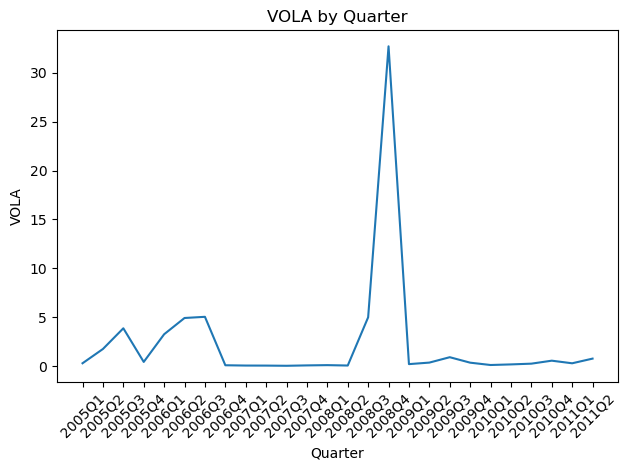

In [75]:
volat = trace.groupby('Quarter').agg(VOLA=('YLD_PT', 'std'), Nq=('YLD_PT', 'count')).reset_index()
volat['VOLAADJ'] = volat['VOLA'] * np.sqrt(4 * volat['Nq'])

display(volat)

plt.plot(volat['Quarter'].astype(str), volat['VOLA'], marker='', linestyle='-')
plt.xlabel('Quarter')
plt.ylabel('VOLA')
plt.title('VOLA by Quarter')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()